# Dataset

Dataset source: https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset

### About Audio Features in Dataset

| Column   |      Value Type      |  Value Description |
|:----------|:--------------------|:-------------------|
| id | - | The Spotify ID for the track. |
| name | string | Name of the track. |
| artist | string | Artist who plays the track. |
| artist_id | - | The Spotify ID for the artist. |
| album | string | The album where the track is on. |
| album_id | - | The Spotify ID for the album. | 
| popularity | int | The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.|
| duration_ms | int | The duration of the track in milliseconds. |
| key | int | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| mode | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| acousticness | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | float | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| speechiness | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| valence | float | 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |

Source: https://github.com/gabrielfas/songs-clustering-recommendations

# Import Libraries and Load Data

In [1]:
import ast
from random import sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from scipy.spatial.distance import cdist
import pickle

In [2]:
artist_df = pd.read_csv('data\data_by_artist.csv')
genres_df =pd.read_csv('data\data_by_genres.csv')
w_genres_df =pd.read_csv('data\data_w_genres.csv')
year_df =pd.read_csv('data\data_by_year.csv')
data_df =pd.read_csv('data\data.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [5]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [6]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [7]:
w_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

Dari semua DataFrame tersebut sejauh ini tidak ditemukan missing value.

In [8]:
data_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Tiap baris table **data_df** memberikan berbagai informasi untuk tiap lagu/song dari `audio features` seperti : acousticness, danceability, dsbnya, `ID`, `year`, dan `artists`.

In [9]:
type(data_df.artists.iloc[0])

str

Dari sini dapat ketahui bahwa value kolom "artists" merupakan *string* yang berbentuk *list*. Berikutnya akan saya ubah ke dalam bentuk *list* dengan function berikut.

In [10]:
# Function yang mengubah string list menjadi list "[...]" -> [...]
def string_list(x):
    return ast.literal_eval(x)

data_df['artists'] = data_df.artists.apply(string_list)

In [11]:
artist_df.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [12]:
w_genres_df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [13]:
genres_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


Tiap baris table **artist_df** memberikan berbagai informasi untuk tiap artist dari `audio features` seperti : acousticness, danceability, dsbnya dimana terdapat sejumlah 28680 baris yang menandakan terdapat 28680 artist yang berbeda(unique) dalam dataset . 

Tiap baris table **genres_df** menjelaskan berbagai informasi untuk tiap genre music, dimana terdapat 2973 jumlah baris yang menandakan terdapat 2973 genre berbeda pada dataset.

Sedangkan table **w_genres_df** merupakan hasil join dari **artist_df** dan **genres_df**, pada `audio features`.

Berikutnya saya akan gunakan info di table **w_genres_df** untuk memasukkan feature *genres* tiap lagu di **data_df**.

In [14]:
w_genres_df['genres'] = w_genres_df.genres.apply(string_list)
w_genres_df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,[show tunes],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [ ]:
# Code berikut cukup memakan waktu lama, untuk mempersingkat silahkan load "data/data.add.csv"

genres_list = []
for i in range(len(data_df)):
    genr = []
    for art in data_df.artists.iloc[i]:
        if art in w_genres_df.artists.unique():
            l_gen = w_genres_df[w_genres_df.artists == art]['genres'].iloc[0]
            genr.extend(l_gen)
        else: continue            
    genres_list.append(genr)
data_df['genres'] = pd.Series(genres_list)

In [ ]:
# Save to csv

#data_df.to_csv('data/data_add.csv')
#artist_genre_df.to_csv('artist_genre.csv')

In [15]:
# Uncomment code dibawah ini apabila anda langsung load 'data_add.csv' sebagai data_df

#data_df = pd.read_csv('data\data_add.csv')
#data_df['genres'] = data_df.genres.apply(string_list)
#data_df['artists'] = data_df.artists.apply(string_list)
#data_df.head()

,Unnamed: 0,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres
0,0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,...,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"[classical, post-romantic era, russian romanti..."
1,1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,...,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,[]
2,2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,...,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,[]
3,3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,...,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,[]
4,4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,...,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,[]


In [16]:
#data_df.drop(columns='Unnamed: 0',inplace=True)

# EDA

Pertama mari coba melihat correlation numeric features pada **data_df**.

<AxesSubplot:>

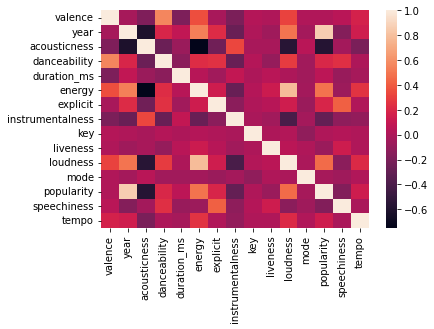

In [17]:
cor_data = data_df.corr()
sns.heatmap(cor_data)

Terdapat beberapa informasi dari correlation features di atas:
- *popularity* memiliki negative correlation dengan feature *acousticness* dan *instrumentalness*. Mengingat popularity disni adalah tingkat lagu yang populer pada tahun 2020, maka dapat dilihat bahwa lagu-lagu yang populer saat 2020 didominasi oleh musik yang kurang sisi akustiknya serta musik instrumental cenderung tidaklah populer di tahun 2020.
- *energy*, *year*, *popularity*, dan *loudness* memiliki negative correlation dengan *acousticness*. Sebagaimana sudah dibahas mengenai popularity dan akustik, selain itu jelas kita ketahui bahwa lagu bertipe akustik memang tidaklah  energic dan cenderung tidak 'loud' serta semakin meningkatnya *year* lagu-lagu semakin berkurang sisi akustiknya.

Dari correlation features di atas tampak cukup masuk akal, oleh karenanya saya akan menggunakan audio features tersebut untuk mencari `similarity` antar lagu dengan mempertimbangkan faktor **genres** lagu maupun artist.

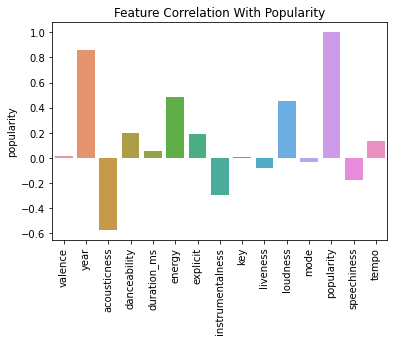

In [18]:
# Audio features correlation with popularity

sns.barplot(x =cor_data.index ,y = cor_data['popularity'])
plt.xticks(rotation = 90)
plt.title('Feature Correlation With Popularity')
plt.show()

Selanjutnya saya akan coba melihat banyaknya lagu tiap tahun dari dataset **data_df**.

<AxesSubplot:xlabel='year', ylabel='Count'>

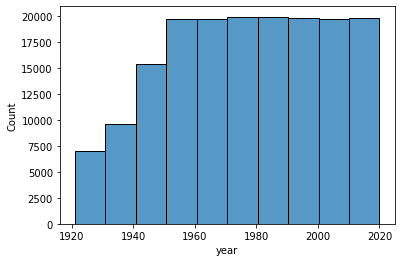

In [19]:
sns.histplot(x='year',data=data_df,bins=10)

Dari gambar di atas, dapat dilihat bahwa lagu pada tahun dibawah 1950 jumlahnya semakin sedikit pada dataset **data_df**.

In [20]:
# Top 5 popular song

data_df.sort_values('popularity',ascending=False).iloc[:5]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres
19611,0.145,2020,0.4010,"[Bad Bunny, Jhay Cortez]",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928,"[latin, reggaeton, trap latino, latin, reggaet..."
19606,0.756,2020,0.2210,"[24kGoldn, iann dior]",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989,[cali rap]
19618,0.737,2020,0.0112,[BTS],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044,"[k-pop, k-pop boy group]"
19608,0.357,2020,0.0194,"[Cardi B, Megan Thee Stallion]",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073,"[pop, pop rap, rap, houston rap, pop, pop rap,..."
19610,0.682,2020,0.4680,[Ariana Grande],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,"[pop, post-teen pop]"


# Build Recommendation System

Untuk recommendation system yang saya gunakan disini adalah berdasarkan content, dimana:
1. Dari input artist dan judul lagu, akan dilakukan filter genres yang sesuai dengan genres artist
2. Mencari distance dari vector 'audio features' input terhadap lagu-lagu di **data_df** yang genre-nya sesuai.
3. Menampilkan rekomendasi lagu dengan n distance terkecil serta rekomendasi artist dari kesesuaian genre input artist.

Sebelum itu saya akan melakukan feature scaling dengan `StandarScaler` pada **data_df** features *feat*.

In [21]:
feat = ['year','popularity' ,'acousticness', 'danceability', 'energy', 
           'instrumentalness', 'key','liveness','loudness', 'mode', 'speechiness',
           'tempo', 'valence']

In [22]:
scaler = StandardScaler()
scaler.fit(data_df[feat])

StandardScaler()

In [23]:
#Save scaler

#with open('backend/scaler.pkl', 'wb') as f:
  #pickle.dump(scaler, f)

# uncomment code below to load scaler

#with open('backend/scaler.pkl', 'rb') as f:
    #scaler = pickle.load(f)  

Untuk mencari informasi dari audio features, link url, dan lainnya pada input artist dan lagu saya menggunakan library `Spotipy`.

- Spotipy is a Python client for the Spotify Web API that makes it easy for developers to fetch data and query Spotify’s catalog for songs. You have to install using pip install spotipy
- After installing Spotipy, you will need to create an app on the Spotify Developer’s page and save your Client ID and secret key

Client ID dan secret key yang digunakan disini disimpan dalam bentuk dictionary txt "id_secret.txt".

In [24]:
# Load Client ID and secret key

with open("backend\id_secret.txt", "r") as f:
    content = f.read()
id_secret = ast.literal_eval(content)

Selanjutnya setup `Spotipy` dengan memasukkan clinet id dan secret key. Berikutnya saya menggunakan `Spotipy` untuk mencari informasi dari input artist dan lagu dengan function berikut.

In [25]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=id_secret['id'],
                                                           client_secret=id_secret['secret']))

def find_song(name, artist):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} artist: {}'.format(name,artist), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    artist_ = sp.artist(results["artists"][0]["external_urls"]["spotify"])
    
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['artist'] = [artist]
    song_data['year'] = [int(results['album']['release_date'][:3])]
    song_data['genres'] =[artist_['genres']]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

Mari kita coba terapkan function **find_song** sebagai berikut.

In [26]:
find_song('basket case','green day')

,name,artist,year,genres,explicit,duration_ms,popularity,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,basket case,green day,199,"[permanent wave, punk]",0,181533,81,0.442,0.943,3,...,0.000009,0.091,0.781,85.064,audio_features,6L89mwZXSOwYl76YXfX13s,spotify:track:6L89mwZXSOwYl76YXfX13s,https://api.spotify.com/v1/tracks/6L89mwZXSOwY...,https://api.spotify.com/v1/audio-analysis/6L89...,4


Dari berbagai percobaan saya memutuskan menggunakan `cityblock` untuk mengukur distance vector input terhadap vector-vector di matrix **data_df** (yang sudah dilakukan filter berdasarkan input artist genre), karena saya ingin difference tiap features input dan output sekecil mungkin, ketimbang  distance `euclidean` ataupun `cosine` dan hasil rekomendasi yang dihasilkan lebih cocok dan sesuai menurut pengamatan saya pribadi.

In [27]:
def get_index_genres(artist,genre): # Define function to get index artist in data_df and genre for that artist
    index = []
    artist_rec = []
    genre = set(genre)
    for i in range(len(data_df)):
        g_data = set(data_df.genres.iloc[i])
        if len(genre.intersection(g_data)) >= 0.5*len(genre): 
            index.append(i)
            art_rec = data_df.artists.iloc[i]
            artist_rec.extend(art_rec)
    artist_rec = set(artist_rec)
    if artist in artist_rec: artist_rec.remove(artist)                    
    return list(set(index)), list(artist_rec)

def get_vector_genre(song_list):
    
    song_vectors = []
    art_genres = []
    
    for song in song_list:
        song_data = find_song(song['name'],song['artist'])
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        art_genre = song_data[['artist','genres']]
        song_vector = song_data[feat].values
        song_vectors.append(song_vector)
        art_genres.append(art_genre)  
    
    song_matrix = np.array(list(song_vectors))
    genres_matrix = np.array(list(art_genres))
    return song_matrix.reshape(1,-1), np.squeeze(genres_matrix)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict

def get_url_image(artist_list):
    res = []
    for art in artist_list:
        get_info = sp.search(q= f'artist: {art}', limit=1)
        link = get_info['tracks']['items'][0]['artists'][0]['external_urls']['spotify']
        link_img = get_info['tracks']['items'][0]['album']['images'][1]['url']
        res.append({'artist':art,'url':link, 'image':link_img})
    return res        


def recommend_songs(song_list, data, n_songs=3):
    
    metadata_cols = ['name', 'year', 'artists', 'id']
    song_dict = flatten_dict_list(song_list)
    song_matrix,genre_art = get_vector_genre(song_list)
    scaled_data = scaler.transform(data[feat])
    scaled_song_matrix = scaler.transform(song_matrix)
    indek,art_rec = get_index_genres(genre_art[0],genre_art[1])
    
    indeks = []

    distances = cdist(scaled_song_matrix, scaled_data[indek,:], 'cityblock')
    indeks = list(np.argsort(distances)[:, :n_songs][0])
    loc_ = data[feat].iloc[indek].iloc[indeks].index

    if n_songs <= len(art_rec):
        art_rec_show = sample(art_rec,n_songs)
    else:
        art_rec_show = art_rec

    rec_songs = data.loc[loc_]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return  rec_songs[metadata_cols].to_dict(orient='records'), get_url_image(art_rec_show)

In [28]:
recommend_songs([
                {'name': 'smells like teen spirit', 'artist':'nirvana'}
                ],  data_df)

c:\Users\ikhbar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


([{'name': 'Smells Like Teen Spirit',
   'year': 1991,
   'artists': ['Nirvana'],
   'id': '5ghIJDpPoe3CfHMGu71E6T'},
  {'name': 'Smells Like Teen Spirit',
   'year': 1991,
   'artists': ['Nirvana'],
   'id': '75aLTVBSGIquqzQ6AkmK3Q'},
  {'name': "The Kids Aren't Alright",
   'year': 1998,
   'artists': ['The Offspring'],
   'id': '4EchqUKQ3qAQuRNKmeIpnf'}],
 [{'artist': 'Elvis Costello',
   'url': 'https://open.spotify.com/artist/4qmHkMxr6pTWh5Zo74odpH',
   'image': 'https://i.scdn.co/image/ab67616d00001e02c39aa62b10cea6cd2c2c1ed8'},
  {'artist': 'The Breeders',
   'url': 'https://open.spotify.com/artist/1xgFexIwrf2QjbU0buCNnp',
   'image': 'https://i.scdn.co/image/ab67616d00001e02cd6cef9805781ced011653d6'},
  {'artist': 'Pixies',
   'url': 'https://open.spotify.com/artist/6zvul52xwTWzilBZl6BUbT',
   'image': 'https://i.scdn.co/image/ab67616d00001e02626ad9bb7d5f84c59652b161'}])

# Kesimpulan

Recommendation system yang dibuat disini cukup menghasilkan rekomendasi artist maupun lagu yang sesuai. Namun terkadang ada beberapa hasil rekomendasi artist maupun lagu yang tidak sesuai, dikarenakan ada beberapa genre artist yang secara aktual kurang sesuai, hal tersebut menimbulkan pencarian rekomendasi artist yang kurang sesuai karena saya melakukan filter terhadap genre input. Selain itu proses pencarian rekomendasi cukup terbilang memakan waktu yang lama, dari 6-10 detik. Hal tersebut dikarenakan algoritma looping keseluruhan data untuk mencari kemiripan genre yang sesuai dengaan genre input artist. Reccomendation system ini juga dapat ditingkatkan dengan memadukan konsep *collaborative filtering method* dengan menggunakan data tambahan seperti playlist sejumlah user.

# Backend test

Untuk model deployment, saya menggunakan `Heroku` paltform untuk membuat backend, yang dapat dilihat pada folder /backend.

In [29]:
import requests

In [30]:
# post method

URL = "https://backend-spotify-rec.herokuapp.com/predict"
param = {'0': [{'name':'smells like teen spirit','artist':'nirvana'}]}
 
r = requests.post(URL, json=param)
print(r.status_code)
r.json()

200


[[{'artists': ['the offspring'],
   'id': '4EchqUKQ3qAQuRNKmeIpnf',
   'name': "the kids aren't alright",
   'year': 1998}],
 [{'artist': 'foxx',
   'image': 'https://i.scdn.co/image/ab67616d00001e021c4ddcf6e2470945f539a64f',
   'url': 'https://open.spotify.com/artist/7LnaAXbDVIL75IVPnndf7w'},
  {'artist': 'my morning jacket',
   'image': 'https://i.scdn.co/image/ab67616d00001e02dd412c4246b0c9c14203459f',
   'url': 'https://open.spotify.com/artist/43O3c6wewpzPKwVaGEEtBM'},
  {'artist': 'alicia keys',
   'image': 'https://i.scdn.co/image/ab67616d00001e0256ff19308ebeb48e2ba6094b',
   'url': 'https://open.spotify.com/artist/3DiDSECUqqY1AuBP8qtaIa'}]]